**Assignment 2**

PART - 1

In [1]:
import pandas as pd

tennis_df=pd.read_csv("PlayTennis.csv")
tennis_df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [2]:
# To check the null values
tennis_df.isna().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [3]:
# Converted categorical data to numerical data using one-hot encoding
# get_dummies method to convert the categorical features to numeric using dummy variables. 

tennis_df = pd.get_dummies(tennis_df, columns=['outlook', 'temp', 'humidity', 'windy'])

In [4]:
# to Split the data into features and target variable

X = tennis_df.drop(['play'], axis=1)
y = tennis_df['play']

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# To Build the decision tree classifier with criterion set to "gini"
# the Gini impurity is to be used to evaluate the quality of each split.

dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X, y)

DecisionTreeClassifier()

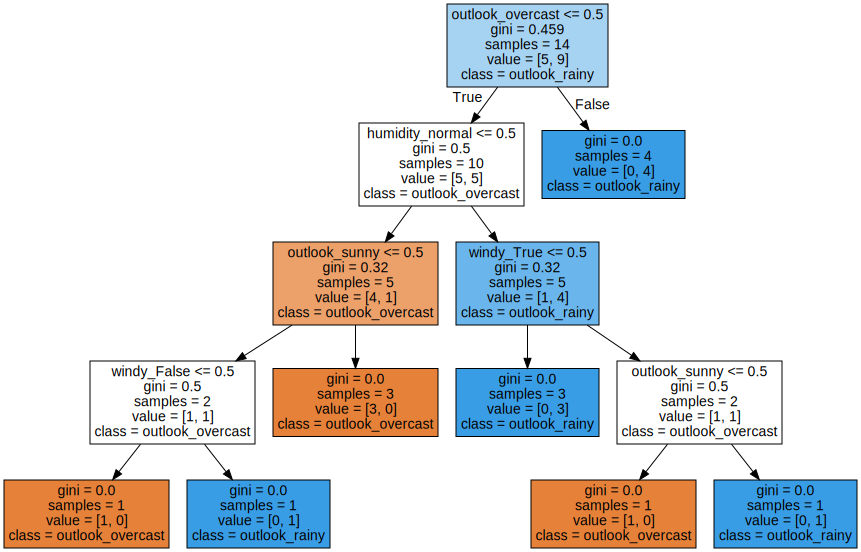

In [6]:
# graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dtc, out_file=None, 
                                feature_names=X.columns,  
                                class_names=X.columns,
                                filled=True)

# To Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In the above decision tree which have been made using graphviz has been clearly shows whether a player is going to play or not depending on the weather.

PART - 2

In [7]:
import pandas as pd

wine_df=pd.read_csv("winequality-red.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# To check for missing values

wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# To Create the three class labels

labels = ['bad', 'decent', 'excellent']
bins = [0, 4, 6, 10]
wine_df['quality_label'] = pd.cut(wine_df['quality'], bins=bins, labels=labels)

In [11]:
# checking the newly created label

print(wine_df['quality_label'].unique())

['decent', 'excellent', 'bad']
Categories (3, object): ['bad' < 'decent' < 'excellent']


In [12]:
# To Verify the new quality column
print(wine_df['quality_label'].value_counts())

decent       1319
excellent     217
bad            63
Name: quality_label, dtype: int64


In [13]:
# to drop the original quality variable
wine_df.drop('quality', axis=1, inplace=True)

# to convert quality_label to numeric using encoding methods
wine_df['quality_label'] = wine_df['quality_label'].replace({'bad': 0, 'decent': 1, 'excellent': 2})

In [14]:
print(wine_df['quality_label'].head())

0    1
1    1
2    1
3    1
4    1
Name: quality_label, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

# splitting the data

X = wine_df.drop('quality_label', axis=1)
y = wine_df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Baseline accuracy:', accuracy)


Baseline accuracy: 0.865625


In [18]:
from sklearn.model_selection import GridSearchCV

# To define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# To create a Grid Search object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

# To fit the Grid Search algorithm to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [19]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8647395833333335


In this model the Randon Forest Classifier baseline accuracy was 86.56% and with the grid search algorithm the best score is 86.47%. The grid search algorithm took a long time to execute because it try out different values and then pick the value that gives the best score. I see for my algorithm there is no huge difference in the accuracy.